In [13]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from llm_src import BPETokenizer

In [14]:
tokenizer = BPETokenizer("C:/Users/aktkr/llm-from-scratch/story.txt")
tokenizer.train()

Training Complete: 1000 merges learned.


In [17]:
vocab_size = tokenizer.vocab_size
print(vocab_size)

1256


In [15]:
with open("C:/Users/aktkr/llm-from-scratch/story.txt", "r", encoding="utf-8") as f:
    text = f.read()

ids = tokenizer.encode(text)
print(len(ids))     # Number of tokens
print(ids[:20])    # First 20 token IDs

319
[1255, 297, 435, 275, 112, 111, 362, 121, 45, 116, 105, 468, 546, 510, 267, 287, 101, 307, 306, 279]


#### **Token Embedding Matrix**

In [20]:
import numpy as np

embedding_dim = 128

token_embeddings = np.random.randn(vocab_size, embedding_dim).astype(np.float32) * 0.02
print(token_embeddings.shape)

(1256, 128)


In [21]:
token_embeddings[:2]

array([[-3.94158647e-04, -9.55745019e-03,  1.68388188e-02,
         4.09159251e-03, -8.74564331e-03,  1.92435645e-02,
         1.90755108e-03, -7.45209493e-03,  6.86051045e-03,
        -2.55955476e-02, -1.86232310e-02,  2.10041180e-02,
         9.16997250e-03,  3.39313708e-02,  3.68232541e-02,
        -3.41781341e-02, -1.60956364e-02,  1.58835035e-02,
         2.42039356e-02,  1.31979212e-02,  2.72109769e-02,
         2.14064214e-03, -4.29750513e-03,  1.92681625e-02,
        -5.70801012e-02,  1.82725228e-02, -5.09485509e-03,
         6.82080444e-03,  1.50560606e-02, -7.42220320e-04,
         1.00108394e-02,  4.39850660e-03,  2.73059178e-02,
        -3.20351869e-02,  8.55521578e-03,  3.28761758e-03,
        -6.14114013e-03, -4.94232401e-03, -4.78906278e-03,
        -1.94302096e-03, -1.30462658e-03, -3.24163921e-02,
        -3.60744894e-02,  1.63934324e-02,  1.80531051e-02,
        -9.07141902e-03,  1.25379059e-02,  1.06743611e-02,
        -1.18615793e-03, -2.11123601e-02, -2.65924279e-0

In [22]:
def embed_tokens(token_ids):
    return token_embeddings[token_ids]

In [23]:
x = embed_tokens(ids[:10])
print(x.shape)

(10, 128)


#### **Positional Embeddings**

In [26]:
context_size = 64

positional_embeddings = np.random.randn(context_size, embedding_dim).astype(np.float32) * 0.02

In [27]:
positional_embeddings[:2]

array([[ 0.01100238,  0.00305172,  0.01454319, -0.00227627, -0.0292094 ,
        -0.01402199, -0.01944352,  0.02423324,  0.02753829, -0.04341506,
        -0.00338697,  0.01387128,  0.0202011 , -0.01327853,  0.01541521,
         0.01064352,  0.04901103, -0.00836728, -0.00714203,  0.01426607,
         0.00361176, -0.0046698 , -0.00952594,  0.03816723, -0.0048577 ,
        -0.02830909,  0.01336329, -0.04597404, -0.0189102 , -0.00379504,
         0.00102799,  0.00528635,  0.0006692 ,  0.01615442, -0.01154113,
         0.01613466,  0.01099568,  0.02339223, -0.01747277, -0.00795142,
         0.02649634,  0.0011873 , -0.00810508, -0.03447156,  0.01235751,
        -0.01548119, -0.01533451, -0.01328437,  0.00879996,  0.03154428,
         0.02028949,  0.00613746,  0.03756947, -0.00623683, -0.01888672,
         0.00168796, -0.01205067, -0.0085886 , -0.03714014, -0.02415603,
         0.00586042, -0.02005615, -0.00918525, -0.02212562,  0.02369791,
         0.02004353, -0.00273763,  0.01831152,  0.0

In [28]:
import torch
import math

def sinusoidal_pos_embeddings(context_size, embedding_dim):
    pos_emb = torch.zeros(context_size, embedding_dim)
    positions = torch.arange(0, context_size, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, embedding_dim, 2).float() * (-math.log(10000.0)/embedding_dim))

    pos_emb[:, 0::2] = torch.sin(positions * div_term)
    pos_emb[:, 1::2] = torch.cos(positions * div_term)

    return pos_emb

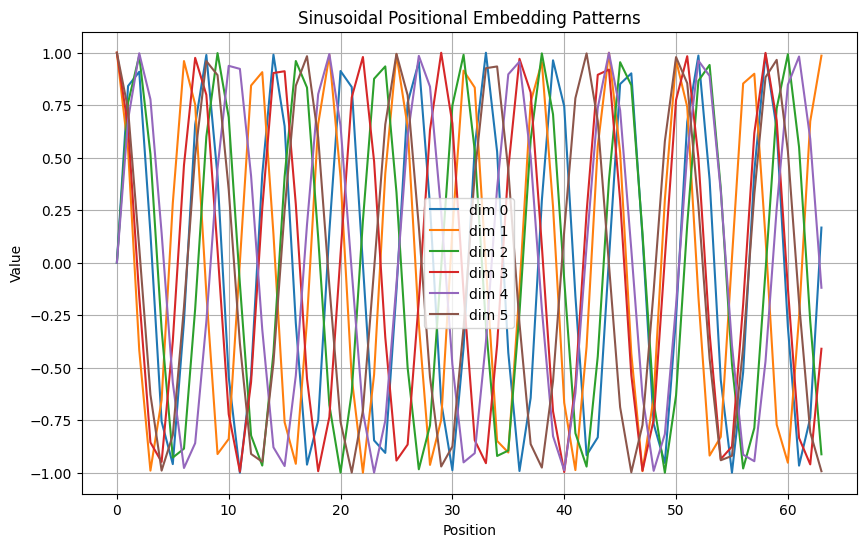

In [35]:
import matplotlib.pyplot as plt 

pe = sinusoidal_pos_embeddings(context_size, embedding_dim)

plt.figure(figsize=(10, 6))

for i in range(6): # first 'n' embedding dimensions
    plt.plot(pe[:, i].detach().numpy(), label=f"dim {i}")

plt.legend()
plt.title("Sinusoidal Positional Embedding Patterns")
plt.xlabel("Position")
plt.ylabel("Value")
plt.grid("True")
plt.show()

#### **Sliding-Window Dataloader**

#### **